In [25]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [26]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [27]:
NUM_CLASSES = 8

# Dataset reading

In [28]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [29]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [32]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 42)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                860       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 8)                 88        
                                                                 
Total params: 1158 (4.52 KB)
Trainable params: 1158 (4.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [34]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [35]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/37 [..............................] - ETA: 6s - loss: 2.1566 - accuracy: 0.1094
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 2.0099 - accuracy: 0.2249 - val_loss: 1.8461 - val_accuracy: 0.3997
Epoch 2/1000
 1/37 [..............................] - ETA: 0s - loss: 1.9092 - accuracy: 0.3672
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
37/37 [==============================] - 0s 1ms/step - loss: 1.8251 - accuracy: 0.3485 - val_loss: 1.6736 - val_accuracy: 0.4133
Epoch 3/1000
 1/37 [..............................] - ETA: 0s - loss: 1.7294 - accuracy: 0.4062
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
37/37 [==============================] - 0s 1ms/step - loss: 1.6768 - accuracy: 0.3763 - val_loss: 1.5120 - val_accuracy: 0.4636
Epoch 4/1000
 1/37 [..............................] - ETA: 0s - loss: 1.5632 - accuracy: 0.4219
E

/Users/jolson/source/sandbox/mp-gesture-recognition/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
37/37 [==============================] - 0s 1ms/step - loss: 1.3664 - accuracy: 0.4476 - val_loss: 1.1652 - val_accuracy: 0.5293
Epoch 7/1000
 1/37 [..............................] - ETA: 0s - loss: 1.3842 - accuracy: 0.4375
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
37/37 [==============================] - 0s 1ms/step - loss: 1.3282 - accuracy: 0.4728 - val_loss: 1.0961 - val_accuracy: 0.5828
Epoch 8/1000
 1/37 [..............................] - ETA: 0s - loss: 1.1592 - accuracy: 0.5625
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
37/37 [==============================] - 0s 1ms/step - loss: 1.2684 - accuracy: 0.4988 - val_loss: 1.0497 - val_accuracy: 0.6299
Epoch 9/1000
 1/37 [..............................] - ETA: 0s - loss: 1.1728 - accuracy: 0.5469
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
37/37 [=============

In [36]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

13/13 [==============================] - 0s 464us/step - loss: 0.2602 - accuracy: 0.9381


In [37]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [38]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 27ms/step
[5.2983411e-02 4.0526867e-02 1.1957591e-06 6.5183294e-06 6.4251502e-09
 1.9682950e-04 4.3270095e-08 9.0628523e-01]
7


# Confusion matrix

49/49 [==============================] - 0s 448us/step


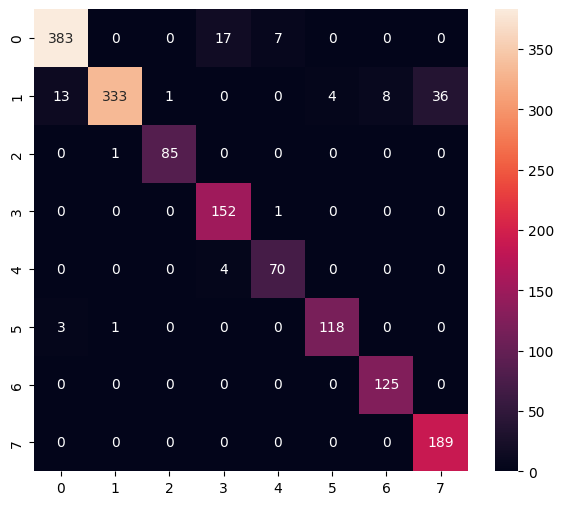

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       407
           1       0.99      0.84      0.91       395
           2       0.99      0.99      0.99        86
           3       0.88      0.99      0.93       153
           4       0.90      0.95      0.92        74
           5       0.97      0.97      0.97       122
           6       0.94      1.00      0.97       125
           7       0.84      1.00      0.91       189

    accuracy                           0.94      1551
   macro avg       0.93      0.96      0.94      1551
weighted avg       0.94      0.94      0.94      1551



In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [40]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/Users/jolson/source/sandbox/mp-gesture-recognition/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/3r/kqg4tlpd7jn4h13d2xdsd9vc0000gq/T/tmpq3hrz0bn/assets


INFO:tensorflow:Assets written to: /var/folders/3r/kqg4tlpd7jn4h13d2xdsd9vc0000gq/T/tmpq3hrz0bn/assets
2024-05-07 23:15:47.629793: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-05-07 23:15:47.629808: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-05-07 23:15:47.630014: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/3r/kqg4tlpd7jn4h13d2xdsd9vc0000gq/T/tmpq3hrz0bn
2024-05-07 23:15:47.630711: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2024-05-07 23:15:47.630717: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /var/folders/3r/kqg4tlpd7jn4h13d2xdsd9vc0000gq/T/tmpq3hrz0bn
2024-05-07 23:15:47.632889: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2024-05-07 23:15:47.662301: I tensorflow/cc/saved_model/loader.cc:215] Running initialization

6748

# Inference test

In [42]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [43]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [44]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [45]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 95 µs, sys: 55 µs, total: 150 µs
Wall time: 139 µs


In [46]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.2983433e-02 4.0526904e-02 1.1957592e-06 6.5183235e-06 6.4251253e-09
 1.9682928e-04 4.3270017e-08 9.0628517e-01]
7
